#Fruit Classification using CNN
Fruit recognition using Deep Convolutional
Neural Network (CNN) is one of the most promising
applications in computer vision. In recent times, deep learning
based classifications are making it possible to recognize fruits
from images. However, fruit recognition is still a problem for
the stacked fruits on weighing scale because of the complexity
and similarity.

#Dataset
Fruit dataset contains 33 classes of fruits and image size is 100,100,3.
1.   Apple Braeburn, Apple Granny Smith, Apricot,Cantaloupe, cherry, Lemon, Papaya, Peach, Pomegranate, Strawberry contain 491 images.
2.   Avocado contain 426 images.
3.   Banana contain 459 images.
4.   Blueberry, clementine, Limes, Mango, Passion Fruit, Pineapple, Raspberry and cactus fruit contain 489 image each.
5.   Corn, Potato Red contain 449 images.
6.   Cucumber Ripe contain 391 images.
7.   Grape Blue contain 983 images.
8.   Kiwi contain 465 images.
9.   Onion white contain 437 images.
10.  Orange contain 478 images.
11.  Pear contain 695 images.
12.  Pepper Green contain 443 images.
13.  Pepper Red contain 665 images.
14.  Plum Contain 446 images.
15.  Tomato contain 737 images.
16.  Watermellon contain 474 images.

#Load Data

In [ ]:
'''Mounting google drive'''
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
'''Unzipping the dataset'''
!unzip gdrive/My\ Drive/Fruit.zip > /dev/null

In [ ]:
data_path='/content/train/train'

#Import Libraries

In [ ]:
import tensorflow as tf
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dense,Dropout

In [ ]:
'''Analyzing Images'''
img=cv2.imread('/content/train/train/Apple Braeburn/Apple Braeburn_0.jpg')
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


#Data Augmentaion
It is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 validation_split=0.2)

In [ ]:
'''For data generation categorical mode is used because of multiclass dataset'''
training_data=train_datagen.flow_from_directory(directory=data_path,
                                                target_size=(100,100),
                                                batch_size=10,
                                                class_mode='categorical',
                                                subset='training')

Found 13493 images belonging to 33 classes.


In [ ]:
validation_data=train_datagen.flow_from_directory(directory=data_path,
                                                  target_size=(100,100),
                                                  batch_size=2,
                                                  class_mode='categorical',
                                                  subset='validation')

Found 3361 images belonging to 33 classes.


In [ ]:
training_data.classes
classes = list(training_data.class_indices.keys())
num_classes=len(classes)

#Data Visualization


In [ ]:
'''Function for plotting images'''
def plotImages(images_arr):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for im,ax in zip(images_arr,axes):
    ax.imshow(im)
  plt.tight_layout()
  plt.show()

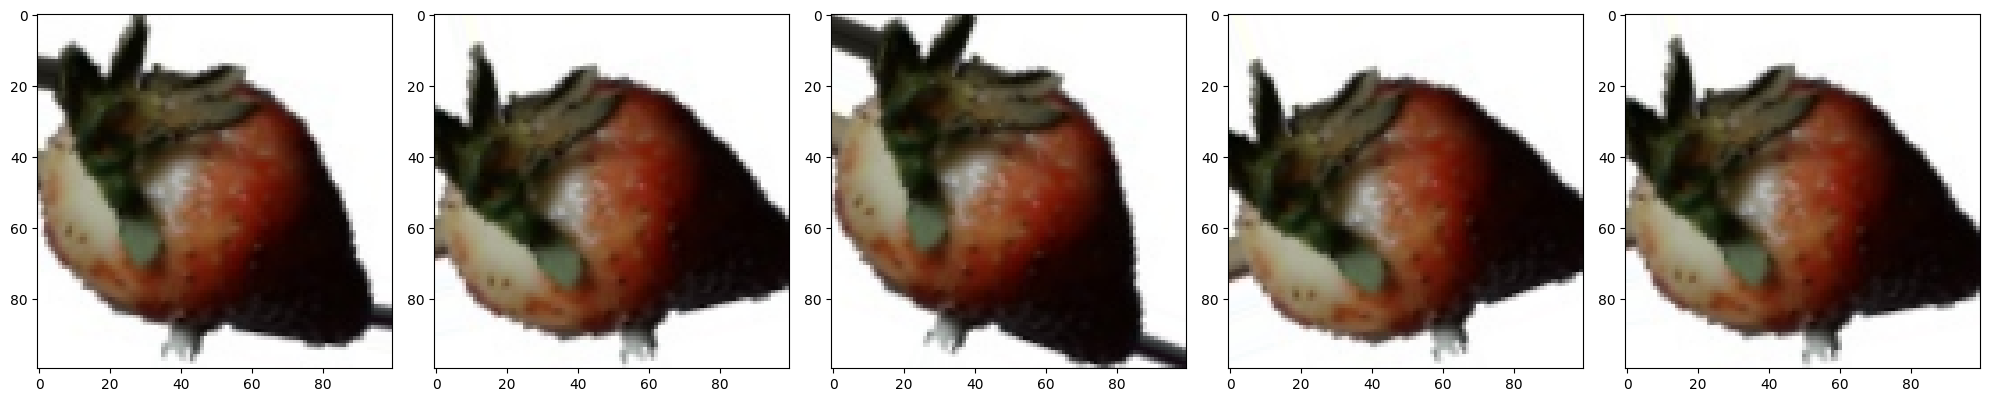

In [ ]:
images=[training_data[0][0][0] for i in range(5)]
plotImages(images)

#Model Building
Sequential Model − Sequential model is basically a linear composition of Keras Layers. Sequential model is easy, minimal as well as has the ability to represent nearly all available neural networks.

In [ ]:
model=Sequential()

Model contain 3 convolution,maxpooling and dense layer each. Activation function is relu in all layer except output where softmax is the activation function.
Droping is used to remove unutilised node to enhance model efficiency.

In [ ]:
from keras.backend import conv2d
model.add(Conv2D(input_shape=(100,100,3),
                 activation='relu',
                 filters=16,
                 kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(activation='relu',
                 filters=32,
                 kernel_size=(3,3)))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(activation='relu',
                 filters=64,
                 kernel_size=(3,3)))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512,activation='relu'))

model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
'''Analyzing model'''
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".
Categorical crossentropy loss function is used for two or more classes.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Early Stopping
EarlyStopping is a callback used while training neural networks, which provides us the advantage of using a large number of training epochs and stopping the training once the model's performance stops improving on the validation Dataset.

In [ ]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                          mode='min',
                                          patience=5)

#Model Evaluation

In [ ]:
'''Fitting the model'''
model.fit(training_data,
          validation_data=validation_data,
          epochs=5,
          verbose=2,
          shuffle=True)

Epoch 1/5
1350/1350 - 300s - loss: 0.3937 - accuracy: 0.8794 - val_loss: 0.0875 - val_accuracy: 0.9759 - 300s/epoch - 222ms/step
Epoch 2/5
1350/1350 - 285s - loss: 0.0762 - accuracy: 0.9778 - val_loss: 0.0623 - val_accuracy: 0.9783 - 285s/epoch - 211ms/step
Epoch 3/5
1350/1350 - 289s - loss: 0.0491 - accuracy: 0.9870 - val_loss: 0.0142 - val_accuracy: 0.9961 - 289s/epoch - 214ms/step
Epoch 4/5
1350/1350 - 281s - loss: 0.0542 - accuracy: 0.9856 - val_loss: 0.0229 - val_accuracy: 0.9908 - 281s/epoch - 208ms/step
Epoch 5/5
1350/1350 - 276s - loss: 0.0413 - accuracy: 0.9893 - val_loss: 0.0055 - val_accuracy: 0.9985 - 276s/epoch - 204ms/step


#Conclusion
Our Model achieved accuracy of 98.93%